In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [11]:
def polynomial_dataframe(df, feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    poly_dataframe= pd.DataFrame()
    poly_dataframe[feature] = df[feature]
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            poly_dataframe[name] = poly_dataframe[feature].apply(lambda x: x**power)
    return poly_dataframe

In [12]:
def data_prep(df, cols):
    x = df[cols].as_matrix()
    b = np.ones(shape=(len(x),1), dtype=np.float32)
    x = np.concatenate((b,x), axis=1)
    return x


In [13]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 
              'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [15]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype= dtype_dict)
train_data.sort_values('sqft_living', inplace = True)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype= dtype_dict)
test_data.sort_values('sqft_living', inplace = True)
valid_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype= dtype_dict)
valid_data.sort_values('sqft_living', inplace = True)
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype= dtype_dict)
set_1.sort_values('sqft_living', inplace = True)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype= dtype_dict)
set_2.sort_values('sqft_living', inplace = True)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype= dtype_dict)
set_3.sort_values('sqft_living', inplace = True)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype= dtype_dict)
set_4.sort_values('sqft_living', inplace = True)

In [18]:
set_1_poly15 = polynomial_dataframe(set_1,'sqft_living', 15 )
set_1_poly15_x = data_prep(df=set_1_poly15, cols=set_1_poly15.columns)
set_1_y = np.array(set_1['price'])

set_2_poly15 = polynomial_dataframe(set_2,'sqft_living', 15 )
set_2_poly15_x = data_prep(df=set_2_poly15, cols=set_2_poly15.columns)
set_2_y = np.array(set_2['price'])

set_3_poly15 = polynomial_dataframe(set_3,'sqft_living', 15 )
set_3_poly15_x = data_prep(df=set_3_poly15, cols=set_3_poly15.columns)
set_3_y = np.array(set_3['price'])

set_4_poly15 = polynomial_dataframe(set_4,'sqft_living', 15 )
set_4_poly15_x = data_prep(df=set_4_poly15, cols=set_4_poly15.columns)
set_4_y = np.array(set_4['price'])


In [38]:
class LinearRegression:
    def __init__(self, train_x, train_y, valid_x=None, valid_y= None, test_x=None, test_y=None):
        self.train_x = train_x
        self.train_y = train_y
        self.train_N = len(train_y)
        self.valid_x = valid_x
        self.valid_y = valid_y
        self.test_x = test_x
        self.test_y = test_y
    def fit(self):
        self.w = np.linalg.solve(np.dot(self.train_x.T,self.train_x), np.dot(self.train_x.T, self.train_y))
        return self.w
    def train_predict(self):
        self.train_y_hat = np.dot(self.train_x,self.w)
        return self.train_y_hat
    def train_RSS(self):
        self.train_predict()
        rss = 0.0
        for i in range(self.train_N):
            rss += np.square(self.train_y[i] - self.train_y_hat[i])
        self.train_RSS = rss
        return self.train_RSS
    def test_RSS(self):
        if not self.test_x == None:
            self.test_y_hat = np.dot(self.test_x,self.w)
            rss = 0.0
            for i in range(len(self.test_y)):
                rss += np.square(self.test_y[i] - self.test_y_hat[i])
            self.test_RSS = rss
            return self.test_RSS
        else: 
            return None
        
    def valid_RSS(self):
        if not self.valid_x == None:
            self.valid_y_hat = np.dot(self.valid_x,self.w)
            rss = 0.0
            for i in range(len(self.valid_y)):
                rss += np.square(self.valid_y[i] - self.valid_y_hat[i])
            self.valid_RSS = rss
            return self.valid_RSS
        else: 
            return None

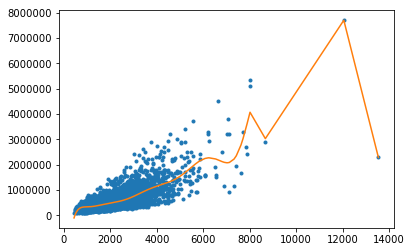

In [25]:
model_set_1 = LinearRegression(train_x=set_1_poly15_x, train_y=set_1_y)
model_set_1_w = model_set_1.fit()
model_set_1_y_hat = model_set_1.train_predict()

plt.plot(set_1_poly15['sqft_living'],set_1_y, '.', set_1_poly15['sqft_living'], model_set_1_y_hat,'-')



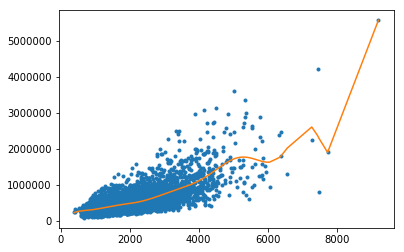

In [22]:
model_set_2 = LinearRegression(train_x=set_2_poly15_x, train_y=set_2_y)
model_set_2_w = model_set_2.fit()
model_set_2_y_hat = model_set_2.train_predict()

plt.plot(set_2_poly15['sqft_living'],set_2_y, '.', set_2_poly15['sqft_living'], model_set_2_y_hat,'-')


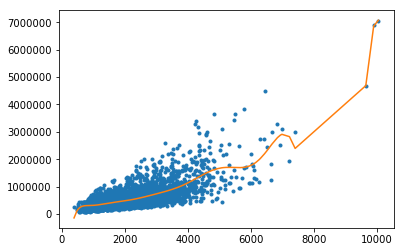

In [23]:
model_set_3 = LinearRegression(train_x=set_3_poly15_x, train_y=set_3_y)
model_set_3_w = model_set_3.fit()
model_set_3_y_hat = model_set_3.train_predict()

plt.plot(set_3_poly15['sqft_living'],set_3_y, '.', set_3_poly15['sqft_living'], model_set_3_y_hat,'-')

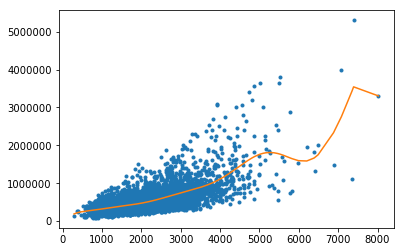

In [24]:
model_set_4 = LinearRegression(train_x=set_4_poly15_x, train_y=set_4_y)
model_set_4_w = model_set_4.fit()
model_set_4_y_hat = model_set_4.train_predict()

plt.plot(set_4_poly15['sqft_living'],set_4_y, '.', set_4_poly15['sqft_living'], model_set_4_y_hat,'-')

In [26]:
model_set_1_w

array([ -4.43013307e+06,   2.16343114e+04,  -4.10428336e+01,
         4.24207043e-02,  -2.62874557e-05,   1.01354115e-08,
        -2.40084380e-12,   3.14646880e-16,  -1.11772925e-20,
        -2.77343179e-24,   3.90918536e-28,  -1.00314153e-32,
        -1.52182859e-36,   1.25245645e-40,  -2.74309414e-45,
        -6.14969006e-51])

In [27]:
model_set_2_w

array([ -2.83177804e+05,   2.43647185e+03,  -3.35599310e+00,
        -5.13850563e-04,   6.56239829e-06,  -8.12896534e-09,
         5.16338575e-12,  -1.97161910e-15,   4.65797786e-19,
        -6.39251060e-23,   3.39406586e-27,   3.64928577e-31,
        -7.86913040e-35,   5.72369625e-39,  -1.78541962e-43,
         1.51889514e-48])

In [28]:
model_set_3_w

array([ -5.76095626e+06,   3.30812721e+04,  -7.65922445e+01,
         9.91818545e-02,  -7.99350647e-05,   4.22993245e-08,
        -1.50324583e-11,   3.57750291e-15,  -5.48104438e-19,
         4.70889120e-23,  -8.11108624e-28,  -2.53810590e-31,
         2.29982657e-35,  -3.80376196e-40,  -3.67760966e-44,
         1.43178959e-48])

In [29]:
model_set_4_w

array([ -1.78977063e+05,   2.47402146e+03,  -6.14438965e+00,
         8.52585147e-03,  -6.87169097e-06,   3.36794298e-09,
        -1.04015192e-12,   2.24976730e-16,  -4.59572524e-20,
         1.02273982e-23,  -1.60170910e-27,   5.33421160e-32,
         2.82772025e-35,  -5.18930312e-39,   3.73258121e-43,
        -1.01562534e-47])

In [30]:
# train_data
# test_data
# valid_data

train_x_poly15 = polynomial_dataframe(train_data,'sqft_living', 15 )
train_x_poly15_x = data_prep(df=train_x_poly15, cols=train_x_poly15.columns)
train_y = np.array(train_data['price'])

valid_x_poly15 = polynomial_dataframe(valid_data,'sqft_living', 15 )
valid_x_poly15_x = data_prep(df=valid_x_poly15, cols=valid_x_poly15.columns)
valid_y = np.array(valid_data['price'])

test_x_poly15 = polynomial_dataframe(test_data,'sqft_living', 15 )
test_x_poly15_x = data_prep(df=test_x_poly15, cols=test_x_poly15.columns)
test_y = np.array(test_data['price'])


In [39]:
summary = pd.DataFrame(data=None, columns=['Model-Degree', 'Train RSS', 'Validation RSS', 'Test RSS'])
index = 0
for i in range (15):
    model = LinearRegression(train_x=train_x_poly15_x[:,:i+2], train_y= train_y,
                             valid_x=valid_x_poly15_x[:,:i+2], valid_y= valid_y,
                             test_x=test_x_poly15_x[:,:i+2], test_y= test_y)
    model.fit()
    train_rss = model.train_RSS()
    valid_rss = model.valid_RSS()
    test_rss = model.test_RSS()
    
    summary.loc[index] = [i+1, train_rss, valid_rss, test_rss]
    index +=1

    
summary.sort_values('Validation RSS', inplace=True)

C:\Users\Sayan\Anaconda3\envs\UdemyML\lib\site-packages\ipykernel\__main__.py:35: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\Sayan\Anaconda3\envs\UdemyML\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [40]:
summary

,Model-Degree,Train RSS,Validation RSS,Test RSS
4,5.0,6.175992e+14,6.200456e+14,1.355672e+14
5,6.0,6.138893e+14,6.201190e+14,1.333836e+14
1,2.0,6.176814e+14,6.239551e+14,1.355420e+14
2,3.0,6.176701e+14,6.258203e+14,1.355860e+14
0,1.0,7.069998e+14,6.290979e+14,1.423479e+14
3,4.0,6.176376e+14,6.299873e+14,1.353827e+14
7,8.0,6.134239e+14,6.959903e+14,1.329034e+14
9,10.0,6.129721e+14,7.271155e+14,1.328134e+14
6,7.0,6.134411e+14,9.869390e+14,1.329860e+14
8,9.0,6.129951e+14,3.415124e+16,1.328270e+14
